<a href="https://colab.research.google.com/github/luyuzhe111/machine-learning-foundamentals/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('data/hw1_p2.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
train_data = data['train']
test_data = data['test']

In [4]:
train_x1 = train_data['x1']
train_x2 = train_data['x2']
train_y = train_data['y'][..., np.newaxis]

test_x1 = test_data['x1']
test_x2 = test_data['x2']
test_y = test_data['ytest'][..., np.newaxis]

In [5]:
def compute_test_error(pred, gt):
  error = np.sqrt(((gt - pred) ** 2).mean())
  print(f'test error is {float(error)}')

### Input basis {$x_1$, 1}

In [6]:
X = np.stack((np.ones(train_x1.shape[0]), train_x1), axis=-1)

In [7]:
w1 = np.linalg.inv(X.T @ X) @ X.T @ train_y

In [8]:
X_test = np.stack((np.ones(test_x1.shape[0]), test_x1), axis=-1)
y_pred = X_test @ w1

In [9]:
compute_test_error(y_pred, test_y)

test error is 53007.39245127847


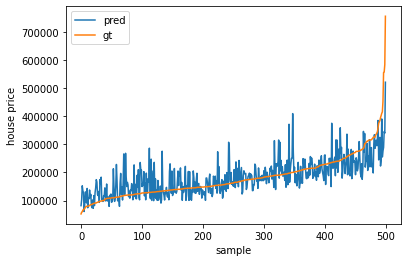

In [10]:
plt.plot(y_pred, label='pred')
plt.plot(test_y, label='gt')
plt.xlabel("sample")
plt.ylabel("house price")
plt.legend()

### Input basis {$x_2$, 1}

In [11]:
X = np.stack((np.ones(train_x2.shape[0]), train_x2), axis=-1)
w2 = np.linalg.inv(X.T @ X) @ X.T @ train_y

In [12]:
X_test = np.stack((np.ones(test_x2.shape[0]), test_x2), axis=-1)
y_pred = X_test @ w2

In [13]:
compute_test_error(y_pred, test_y)

test error is 67402.18200423503


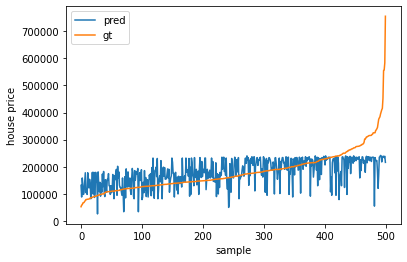

In [14]:
plt.plot(y_pred, label='pred')
plt.plot(test_y, label='gt')
plt.xlabel("sample")
plt.ylabel("house price")
plt.legend()

### Input basis {$x_1$, $x_2$, 1}

In [15]:
X = np.stack((np.ones(train_x2.shape[0]), train_x1, train_x2), axis=-1)
w3 = np.linalg.inv(X.T @ X) @ X.T @ train_y

In [16]:
X_test = np.stack((np.ones(test_x2.shape[0]), test_x1, test_x2), axis=-1)
y_pred = X_test @ w3

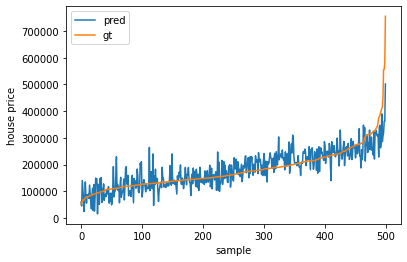

In [17]:
plt.plot(y_pred, label='pred')
plt.plot(test_y, label='gt')
plt.xlabel("sample")
plt.ylabel("house price")
plt.legend()

In [18]:
compute_test_error(y_pred, test_y)

test error is 43871.6817270682


### Input basis {1, $x_1$, $x_2$, $x_1^{2}$, $x_2^{2}$, $x_1{x_2}$}

In [22]:
X = np.stack((np.ones(train_x2.shape[0]), train_x1, train_x2, train_x1 ** 2, train_x2 ** 2, train_x1 * train_x2), axis=-1)

In [23]:
w9 = np.linalg.inv(X.T @ X) @ X.T @ train_y

In [24]:
X_test = np.stack((np.ones(test_x2.shape[0]), test_x1, test_x2, test_x1 ** 2, test_x2 ** 2, test_x1 * test_x2), axis=-1)
y_pred = X_test @ w9

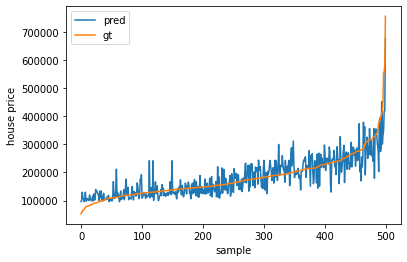

In [25]:
plt.plot(y_pred, label='pred')
plt.plot(test_y, label='gt')
plt.xlabel("sample")
plt.ylabel("house price")
plt.legend()

In [26]:
compute_test_error(y_pred, test_y)

test error is 39013.00905592067


The error using polynomial regression (39013) is lower than the best-performing linear model (43872).

### Ridge Regression

The solution for ridge regression is $w$ = ($X^{T}X + \lambda I)^{-1}X^{T}y$

In [31]:
X = np.stack((np.ones(train_x2.shape[0]), train_x1, train_x2), axis=-1)
lambdas = [1 / np.power(10, i) for i in range(1, 6)]

errors = []
for l in lambdas:
  w_r = np.linalg.inv(X.T @ X + l * np.eye(3)) @ X.T @ train_y
  pred = X @ w_r
  gt = test_y
  errors.append(np.sqrt(((gt - pred) ** 2).mean()))

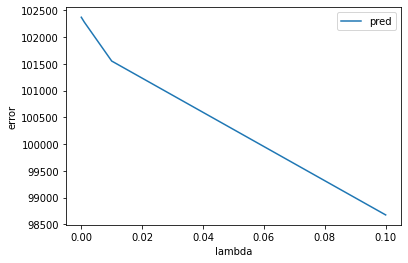

In [32]:
plt.plot(lambdas, errors, label='pred')
plt.xlabel("lambda")
plt.ylabel("error")
plt.legend()

Conclusion: based on the plot, as lambda increases, the test error decreases. This is an indication that at a certain range, increase lambda can reduce model overfitting on the training set. 